### Principal Component Analysis from Scratch

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Reading the dataset

In [2]:
data = pd.read_csv("iris.csv")
data.drop('Id',axis = 1, inplace = True)
# data = data.sample(frac=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
Features = data.drop("Species",axis=1).reset_index()
Features

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


In [4]:
Features_scaled = StandardScaler().fit_transform(Features)
Features_scaled

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

In [5]:
target = data['Species']
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Covariance Matrix

In [6]:
cov = np.cov(Features_scaled.T)
cov

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ,  0.90579723],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.90579723,  0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Eigen Value Decomposition

In [7]:
values, vectors = np.linalg.eig(cov)
print("Values[:10] : ",values[:10])
print("Vectors[:10] : ",vectors[:10])

Values[:10] :  [3.7603354  0.92794917 0.23570257 0.08883057 0.02073933]
Vectors[:10] :  [[-0.48136016 -0.02275157 -0.67406853  0.55978662 -0.0067323 ]
 [-0.44844975  0.38285827  0.64520569  0.40999945  0.26061932]
 [ 0.23195044  0.92007839 -0.27427786 -0.09491665 -0.12416613]
 [-0.51079205  0.03074857  0.13238322 -0.28817343 -0.79848404]
 [-0.5024696   0.07356757 -0.19127876 -0.65305918  0.52824072]]


### Normalization of Eigen Values

In [8]:
explained_variance = []
sum_eigen = np.sum(values)
for i in range(len(values)):
    explained_variance.append(values[i]/sum_eigen)
explained_variance

[0.7470533000277261,
 0.18435256887931983,
 0.046826244205088075,
 0.017647673742565043,
 0.004120213145300962]

### Plotting the Normed Eigen Values

<BarContainer object of 5 artists>

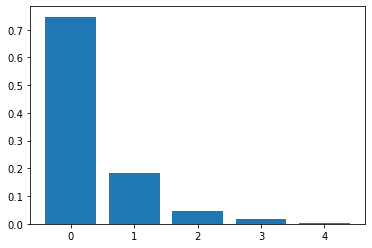

In [9]:
plt.bar(range(len(explained_variance)),explained_variance)

### Cumulative Variance

In [10]:
cumulative_variance = []

cumulative_variance.append(explained_variance[0])
for i in range(len(explained_variance)):
    if i == 0:
        continue
    cumulative_variance.append(explained_variance[i]+cumulative_variance[i-1])

cumulative_variance

[0.7470533000277261,
 0.9314058689070459,
 0.978232113112134,
 0.995879786854699,
 1.0]

<BarContainer object of 5 artists>

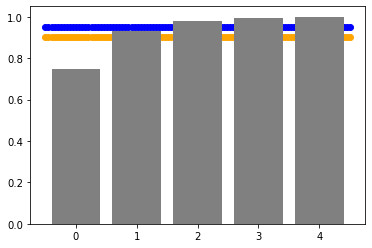

In [11]:
plt.scatter(np.linspace(-0.5,4.5,100),np.ones_like(np.linspace(-0.5,4.5,100))*0.9,color="orange")
plt.scatter(np.linspace(-0.5,4.5,100),np.ones_like(np.linspace(-0.5,4.5,100))*0.95,color="blue")
plt.bar(range(len(cumulative_variance)),cumulative_variance, color="grey")


### Projection to Eigen Spaces

In [12]:
PC1 = Features_scaled@vectors.T[0]
PC2 = Features_scaled@vectors.T[1]
PC3 = Features_scaled@vectors.T[2]

PCA_data = pd.DataFrame(PC1, columns=['PC1'])
PCA_data['PC2'] = PC2
PCA_data['PC3'] = PC3
PCA_data['Species'] = target
PCA_data

,PC1,PC2,PC3,Species
0,2.816339,0.506051,0.369151,Iris-setosa
1,2.645527,-0.651799,0.514571,Iris-setosa
2,2.879481,-0.321036,0.208181,Iris-setosa
3,2.810934,-0.577363,0.192961,Iris-setosa
4,2.879884,0.670468,0.165235,Iris-setosa
...,...,...,...,...
145,-2.424421,0.377119,-0.561953,Iris-virginica
146,-2.164220,-0.915696,-0.487354,Iris-virginica
147,-2.139796,0.254272,-0.674000,Iris-virginica
148,-2.029480,0.998725,-1.238365,Iris-virginica


### Plotting data on eigen spaces with projection

<AxesSubplot:title={'center':'Species on Principal Component 1'}, xlabel='PC1'>

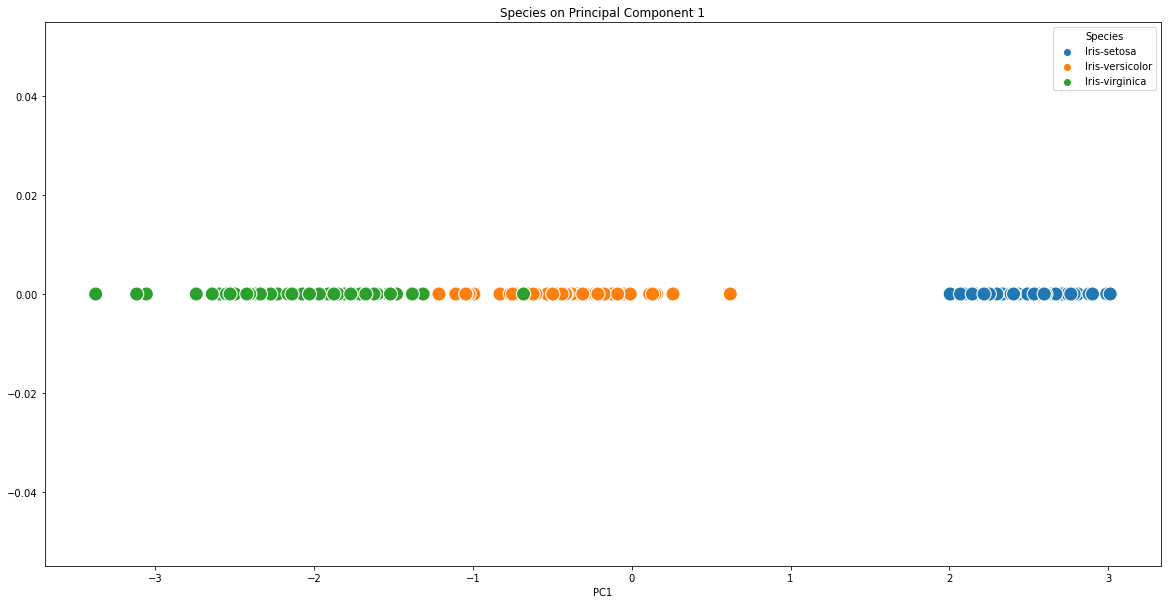

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 1")
sns.scatterplot(x=PCA_data['PC1'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

<AxesSubplot:title={'center':'Species on Principal Component 2'}, xlabel='PC2'>

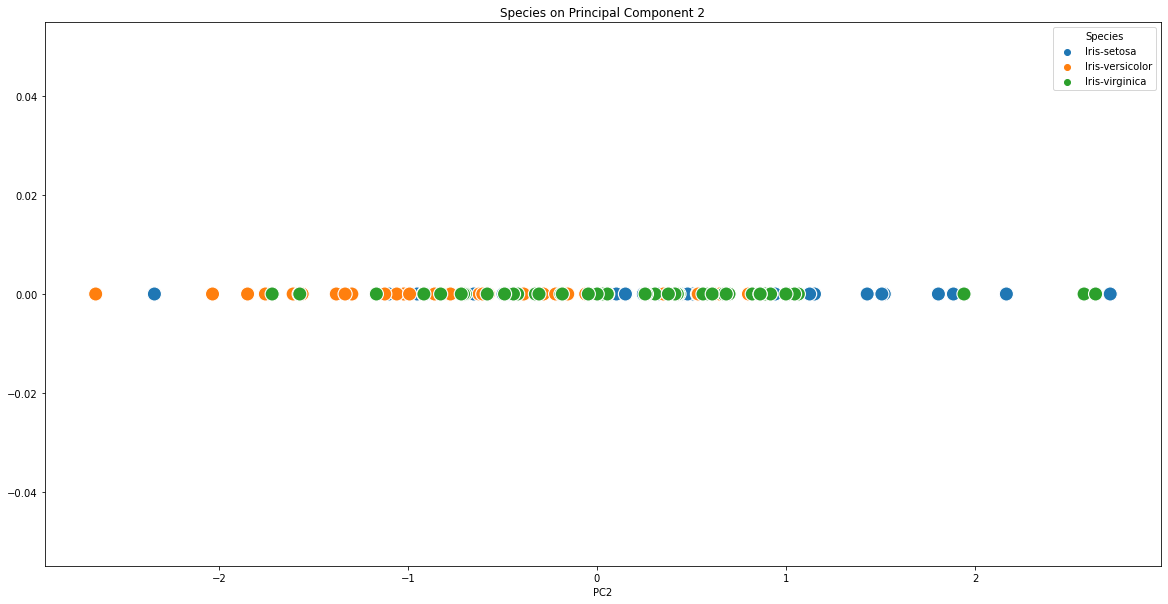

In [14]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 2")
sns.scatterplot(x=PCA_data['PC2'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

<AxesSubplot:title={'center':'Species on Principal Component 3'}, xlabel='PC2'>

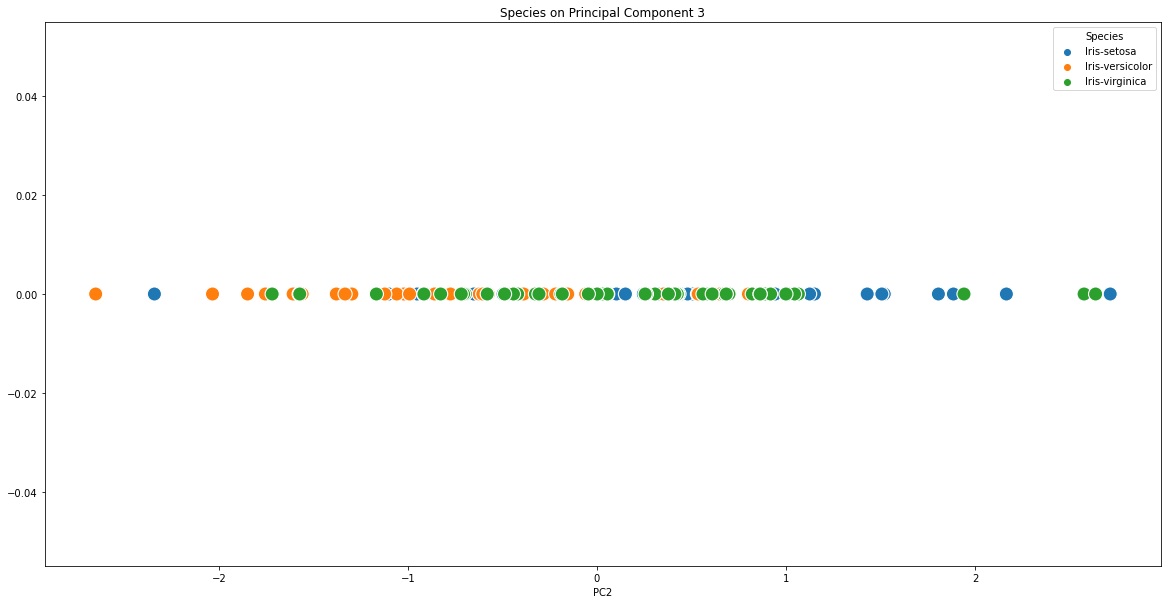

In [15]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 3")
sns.scatterplot(x=PCA_data['PC2'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

### Observation : It is visible that except PC1 other axis does not provide great discriminative features

<AxesSubplot:title={'center':'Scatter over PC1 and PC2'}, xlabel='PC1', ylabel='PC2'>

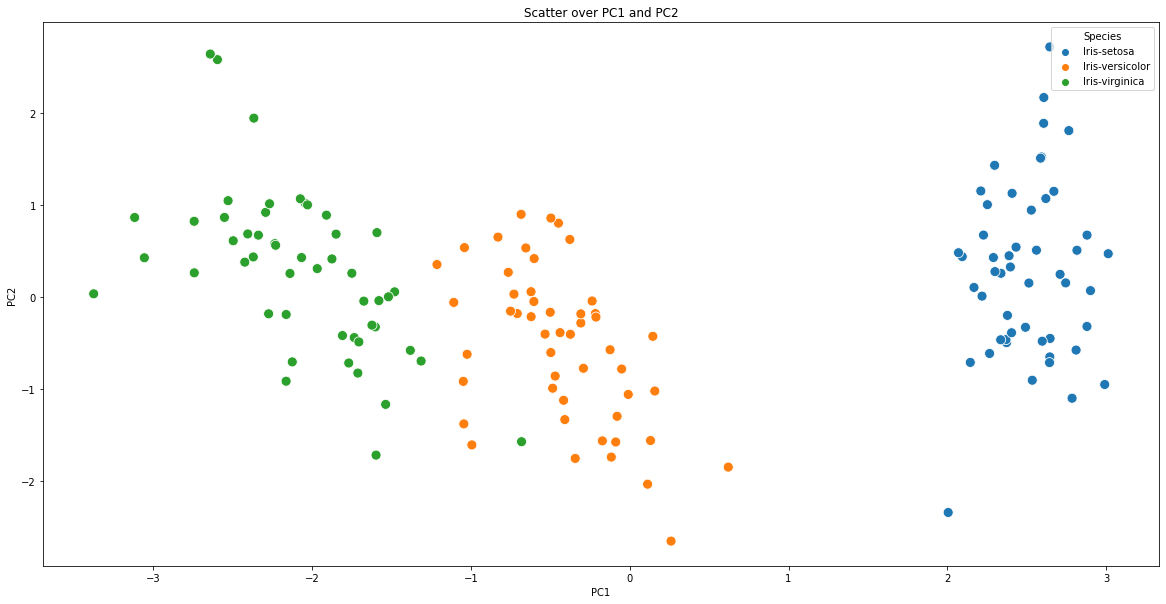

In [16]:
plt.figure(figsize=(20, 10))
plt.title("Scatter over PC1 and PC2")
sns.scatterplot(x=PCA_data['PC1'], y=PCA_data['PC2'], hue=PCA_data['Species'], s=100)

### Projection on 3d space with first 3 Principal Component

Text(0.5, 0, 'PC3')

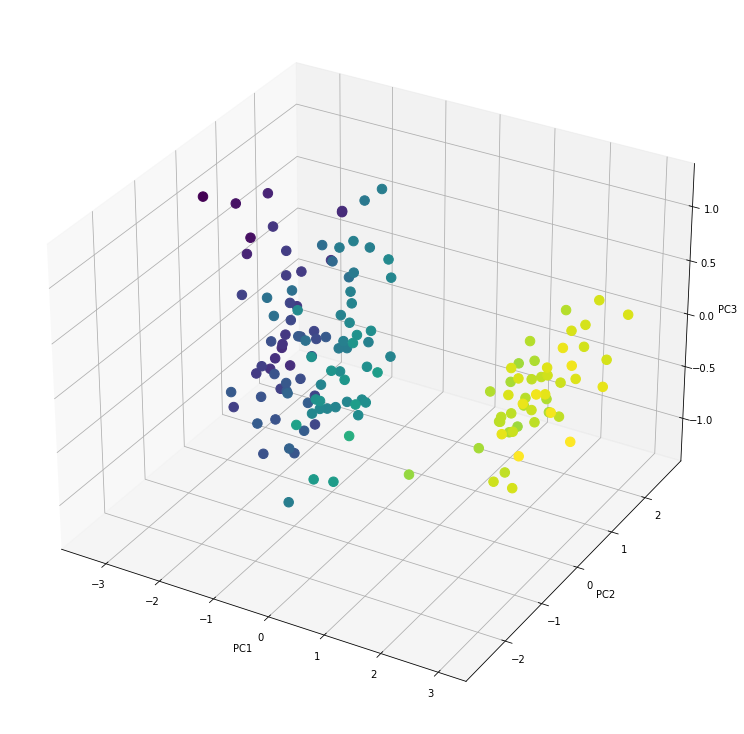

In [17]:
fig = plt.figure(figsize=(20,10))

ax = Axes3D(fig)


g = ax.scatter(PCA_data['PC1'], PCA_data['PC2'], PCA_data['PC3'], c=PCA_data['PC1'], marker='o', depthshade=False, s=90)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

### Thank you